##CIFAR 10

<p align="center">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Henry Carmona Collazos - 2185965 &nbsp&nbsp&nbsp&nbsp&nbsp&nbsp Daniel Alejandro Tobar - 2185884
  </font>
<p>
<p align="center">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Brahyan C. Marulanda - 2185962 &nbsp&nbsp&nbsp&nbsp&nbsp Diego Ivan Perea M.       - 2185751
  </font>
<p>

#### IMPORTANDO LIBRERIAS

In [ ]:
from keras.datasets import cifar10
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical   
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.utils import np_utils

#### DESCARGANDO CIFRAR10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

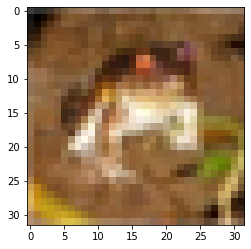

In [ ]:
plt.imshow(x_train[0])

#### NORMALIZACIÓN DE LOS DATOS

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


#### VECTOR ONE HOT-ENCONDING

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


#### ARQUITECTURA DE LA RED

In [ ]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

print(input_shape)
print(num_classes)

(32, 32, 3)
10


In [ ]:
def model():# 32x32
  model = Sequential()
  model.add(Conv2D(32,(5,5), input_shape=input_shape, activation='relu'))#28x28
  model.add(Conv2D(32,(3,3), activation='relu'))#26x26
  model.add(MaxPooling2D(pool_size=(2,2)))#13x13

  model.add(Conv2D(32,(3,3), activation='relu'))#11x11
  model.add(MaxPooling2D(pool_size=(2,2)))#5x5

  model.add(Dropout(0.3))
  model.add(Flatten())

  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.summary()

  opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

  model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

  return model

In [ ]:
model = model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


#### ENTRENAMIENTO DE LA RED

In [ ]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 35, batch_size=32, shuffle=True)

Epoch 1/35
1563/1563 [==============================] - 17s 8ms/step - loss: 2.0667 - accuracy: 0.2283 - val_loss: 1.8993 - val_accuracy: 0.3289
Epoch 2/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7372 - accuracy: 0.3630 - val_loss: 1.6461 - val_accuracy: 0.3867
Epoch 3/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6003 - accuracy: 0.4136 - val_loss: 1.4969 - val_accuracy: 0.4563
Epoch 4/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4994 - accuracy: 0.4534 - val_loss: 1.3959 - val_accuracy: 0.4912
Epoch 5/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4282 - accuracy: 0.4807 - val_loss: 1.3479 - val_accuracy: 0.5150
Epoch 6/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3684 - accuracy: 0.5055 - val_loss: 1.2843 - val_accuracy: 0.5379
Epoch 7/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3156 - accuracy: 0.5263 - val_loss: 1.2233 - val_accuracy

In [ ]:
score = model.evaluate(x_test,y_test, verbose=0)
print(score)

[0.7683781981468201, 0.7357000112533569]


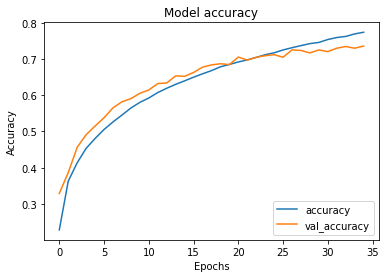

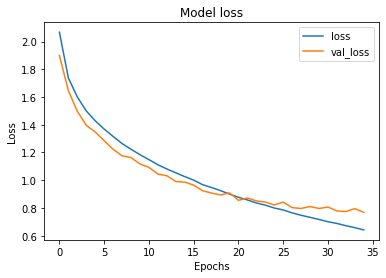

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

#### MATRIZ DE CONFUSION

(10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.00913981 0.00152828 0.13058878 0.39514652 0.08719182 0.14366049
 0.19701295 0.01030949 0.02097008 0.00445185]


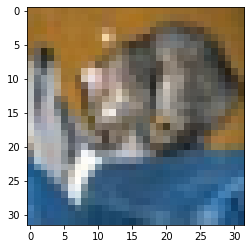

In [ ]:
from sklearn.metrics import confusion_matrix

outputTest = model.predict(x_test)
print(outputTest.shape)
print(y_test[0])
print(outputTest[0])
plt.imshow(x_test[0])

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(outputTest, axis=1))
print(cm)

[[747  13  29  18  35   2  10  20  91  35]
 [ 26 820   2  11   5   5  12   4  40  75]
 [ 56  10 544  68 137  54  62  37  24   8]
 [ 19   6  36 528  93 155  73  54  26  10]
 [ 16   1  27  43 773  20  44  60  14   2]
 [  9   2  35 185  63 600  29  62  10   5]
 [  4   3  22  52  41  14 844  10   7   3]
 [ 12   2  20  32  88  29   5 797   5  10]
 [ 31  17   7  14   6   2   2   7 891  23]
 [ 23  47   8  19  12   5   7  25  41 813]]


In [ ]:
def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['0', '1', '2','3', '4', '5','6', '7', '8','9']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,3)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

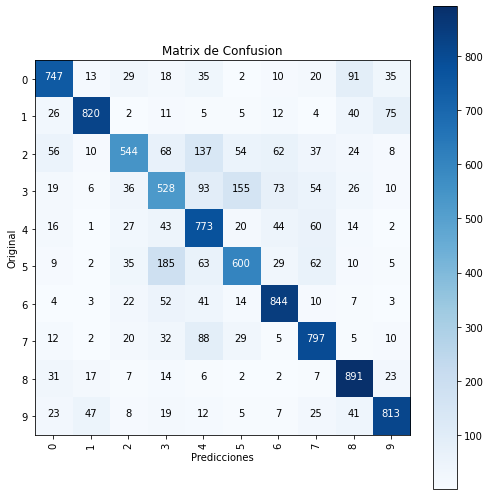

In [ ]:
plot_confusion_matrix(cm, num_classes)